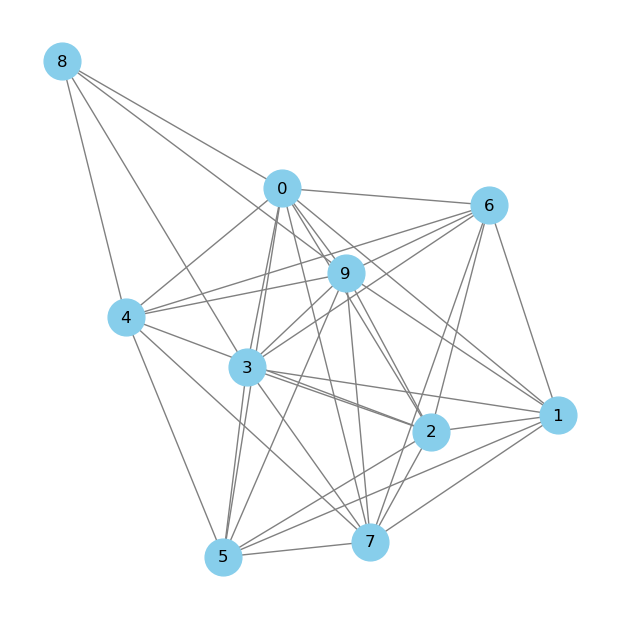

True
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


In [1]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10 # Number of nodes
p = 0. # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()
print(nx.is_connected(G))

# Assign labels to nodes based on their connected component
component_labels = {node: i for i, component in enumerate(nx.connected_components(G)) for node in component}

# Print node labels
print(component_labels)

In [2]:
### CREATE SPANNING TREE ###

import networkx as nx
import random

# Select a random starting node
random_node = random.choice(list(G.nodes))

# Get a spanning tree using DFS
spanning_tree = nx.dfs_tree(G, source=random_node)

# Convert spanning tree to an undirected graph
spanning_tree_undirected = nx.Graph(spanning_tree)

print(spanning_tree_undirected.edges())

[(9, 0), (0, 1), (1, 2), (2, 3), (3, 5), (5, 4), (4, 6), (4, 8), (6, 7)]


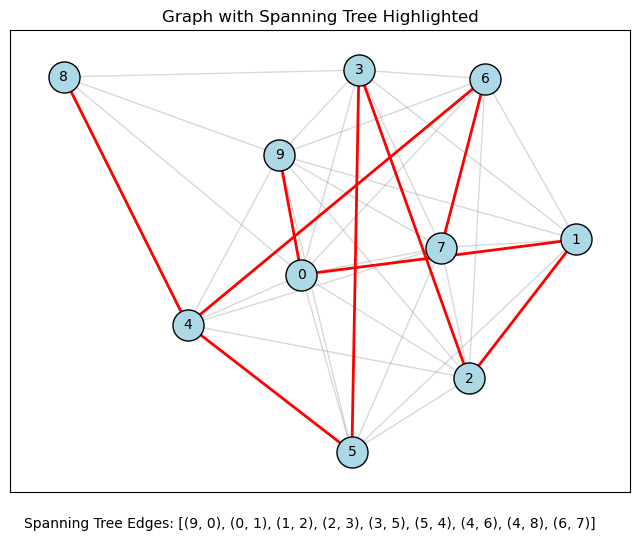

In [3]:
### PRINT SPANNING TREE ###

def plot_spanning_tree(G, spanning_tree):
    """Plot the original graph and highlight the undirected spanning tree edges."""
    
    pos = nx.spring_layout(G)  # Compute layout for nodes

    plt.figure(figsize=(8, 6))

    # Draw the original graph edges first (background edges)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3, width=1)

    # Draw spanning tree edges in red
    nx.draw_networkx_edges(spanning_tree, pos, edge_color="red", width=2)

    # Draw nodes on top of edges
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", edgecolors="black", node_size=500)

    # Draw labels on top
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Graph with Spanning Tree Highlighted")

    # Add subtitle below the graph listing the spanning tree edges
    spanning_tree_edges = list(spanning_tree.edges())
    subtitle = f"Spanning Tree Edges: {spanning_tree_edges}"
    plt.figtext(0.5, 0.05, subtitle, wrap=True, horizontalalignment='center', fontsize=10)
    
    plt.show()



# Plot the graph with the spanning tree highlighted
plot_spanning_tree(G, spanning_tree_undirected)

In [4]:
### GENERATE SET OF FUNDAMENTAL CYCLES ###

import networkx as nx
import random

# Ensure spanning tree edges are treated as undirected
spanning_tree_edges = set(spanning_tree_undirected.edges())

# Find edges not in the spanning tree (back edges)
generating_edges = [(u, v) for u, v in G.edges() if (u, v) not in spanning_tree_edges and (v, u) not in spanning_tree_edges]

print("Generating edges:", generating_edges)
print("All Graph Edges:", list(G.edges()))
print("Spanning Tree Edges:", list(spanning_tree_undirected.edges()))

# Find the fundamental set of cycles
fundamental_cycles = []
for u, v in generating_edges:
    print(u, v)
    # Find the path in the spanning tree between u and v
    path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
    cycle = path + [u]  # Complete the cycle
    print(f"Edge ({u}, {v}) generates cycle: {cycle}")
    fundamental_cycles.append(cycle)

# Print fundamental cycles
for i, cycle in enumerate(fundamental_cycles):
    print(f"Cycle {i+1}: {cycle} (generated by edge {generating_edges[i]})")


Generating edges: [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 6), (3, 7), (3, 8), (3, 9), (4, 7), (4, 9), (5, 7), (5, 9), (6, 9), (7, 9), (8, 9)]
All Graph Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 7), (5, 9), (6, 7), (6, 9), (7, 9), (8, 9)]
Spanning Tree Edges: [(9, 0), (0, 1), (1, 2), (2, 3), (3, 5), (5, 4), (4, 6), (4, 8), (6, 7)]
0 2
Edge (0, 2) generates cycle: [0, 1, 2, 0]
0 3
Edge (0, 3) generates cycle: [0, 1, 2, 3, 0]
0 4
Edge (0, 4) generates cycle: [0, 1, 2, 3, 5, 4, 0]
0 5
Edge (0, 5) generates cycle: [0, 1, 2, 3, 5, 0]
0 6
Edge (0, 6) generates cycle: [0, 1, 2, 3, 5, 4, 6, 0]
0 7
Edge (0, 7) generates cycle: [0, 1, 2, 3, 5, 4, 6, 7, 0]
0 8
Edge (0, 8) generates cy

In [5]:
bridges = {}
for c in fundamental_cycles:
    print(c)
    bridges[tuple(c)] = []
    G_no_c = G.copy()
    G_no_c.remove_edges_from([(c[i], c[i+1]) for i in range(len(c)-1)])
    

[0, 1, 2, 0]
[0, 1, 2, 3, 0]
[0, 1, 2, 3, 5, 4, 0]
[0, 1, 2, 3, 5, 0]
[0, 1, 2, 3, 5, 4, 6, 0]
[0, 1, 2, 3, 5, 4, 6, 7, 0]
[0, 1, 2, 3, 5, 4, 8, 0]
[1, 2, 3, 1]
[1, 2, 3, 5, 1]
[1, 2, 3, 5, 4, 6, 1]
[1, 2, 3, 5, 4, 6, 7, 1]
[1, 0, 9, 1]
[2, 3, 5, 4, 2]
[2, 3, 5, 2]
[2, 3, 5, 4, 6, 2]
[2, 3, 5, 4, 6, 7, 2]
[2, 1, 0, 9, 2]
[3, 5, 4, 6, 3]
[3, 5, 4, 6, 7, 3]
[3, 5, 4, 8, 3]
[3, 2, 1, 0, 9, 3]
[4, 6, 7, 4]
[4, 5, 3, 2, 1, 0, 9, 4]
[5, 4, 6, 7, 5]
[5, 3, 2, 1, 0, 9, 5]
[6, 4, 5, 3, 2, 1, 0, 9, 6]
[7, 6, 4, 5, 3, 2, 1, 0, 9, 7]
[8, 4, 5, 3, 2, 1, 0, 9, 8]


Processing cycle: [0, 1, 2, 0]
Bridges: [{'edges': [(0, 3), (3, 1), (3, 2), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (5, 0), (5, 1), (5, 2), (5, 4), (5, 7), (5, 9), (6, 0), (6, 1), (6, 2), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 4), (7, 9), (8, 0), (8, 4), (8, 9), (9, 0), (9, 1), (9, 2), (9, 4), (4, 0), (4, 2)], 'att_ver': {0, 1, 2}}]


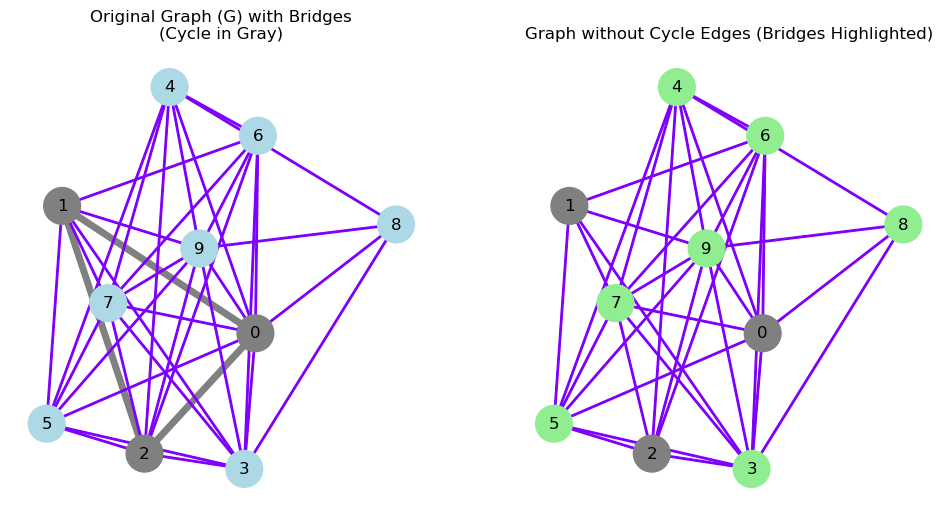

Processing cycle: [0, 1, 2, 3, 0]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 4), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 7), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 9), (8, 0), (8, 3), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3)], 'att_ver': {0, 1, 2, 3}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}]


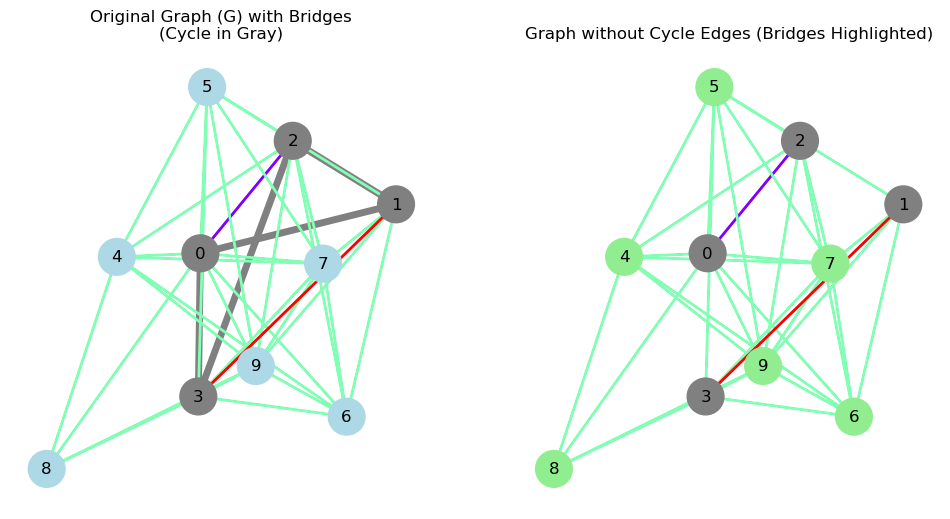

Processing cycle: [0, 1, 2, 3, 5, 4, 0]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 8), (8, 0), (8, 3), (8, 4)], 'att_ver': {0, 1, 2, 3, 4, 5}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}]


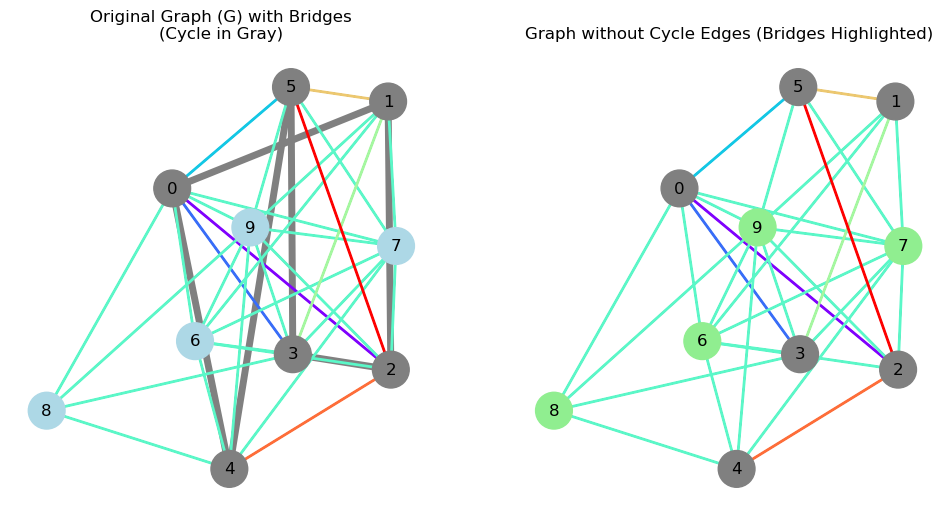

Processing cycle: [0, 1, 2, 3, 5, 0]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 5), (7, 9), (8, 0), (8, 3), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 5)], 'att_ver': {0, 1, 2, 3, 5}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}]


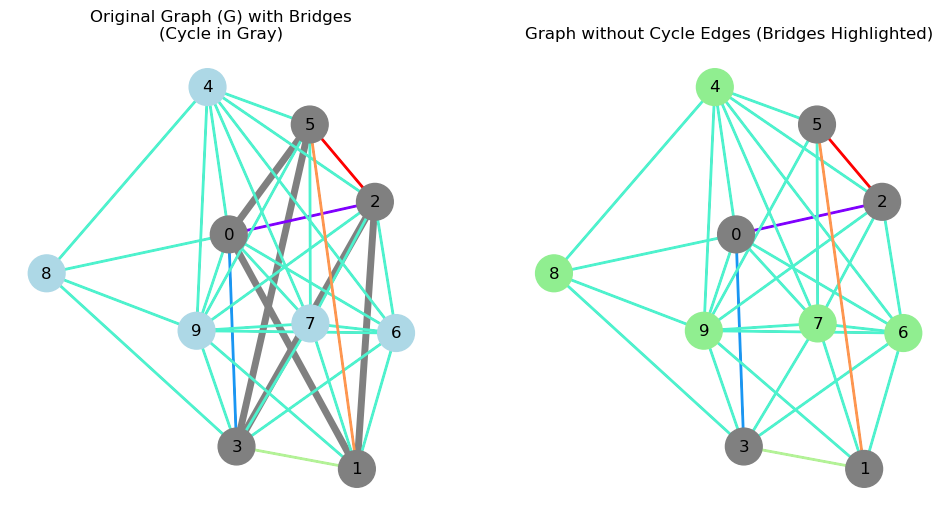

Processing cycle: [0, 1, 2, 3, 5, 4, 6, 0]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 8), (8, 0), (8, 3), (8, 4)], 'att_ver': {0, 1, 2, 3, 4, 5, 6}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 6)], 'att_ver': {1, 6}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}]


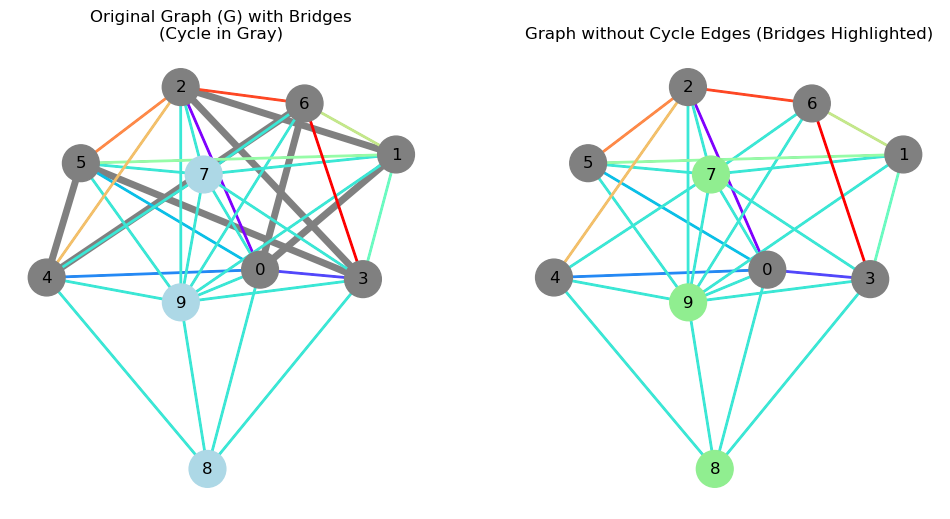

Processing cycle: [0, 1, 2, 3, 5, 4, 6, 7, 0]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6)], 'att_ver': {0, 6}}, {'edges': [(0, 8), (8, 3), (8, 4), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7)], 'att_ver': {0, 1, 2, 3, 4, 5, 6, 7}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 6)], 'att_ver': {1, 6}}, {'edges': [(1, 7)], 'att_ver': {1, 7}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(2, 7)], 'att_ver': {2, 7}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}, {'edges': [(3, 7)], 'att_ver': {3, 7}}, {'edges': [(4, 7)], 'att_ver': {4, 7}}, {'edges': [(5, 7)], 'att_ver': {5, 7}}]


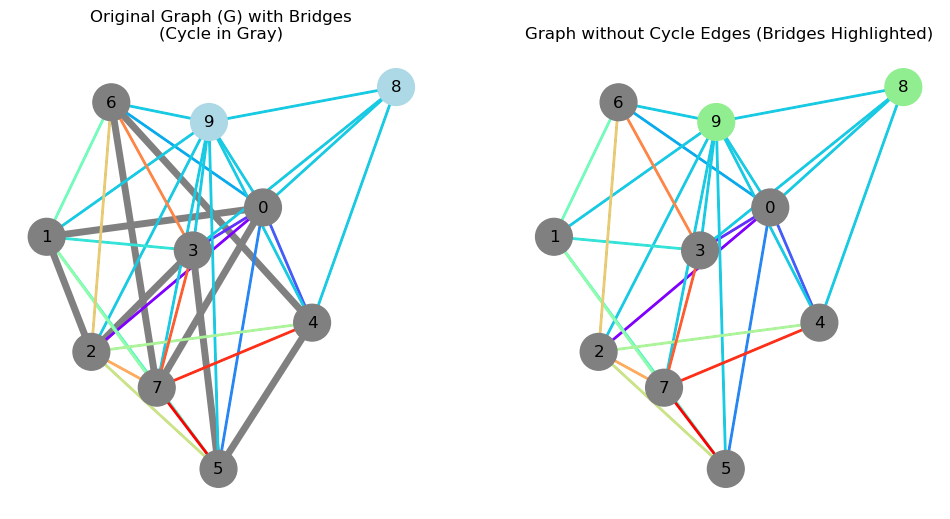

Processing cycle: [0, 1, 2, 3, 5, 4, 8, 0]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 8)], 'att_ver': {0, 1, 2, 3, 4, 5, 8}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(3, 8)], 'att_ver': {8, 3}}]


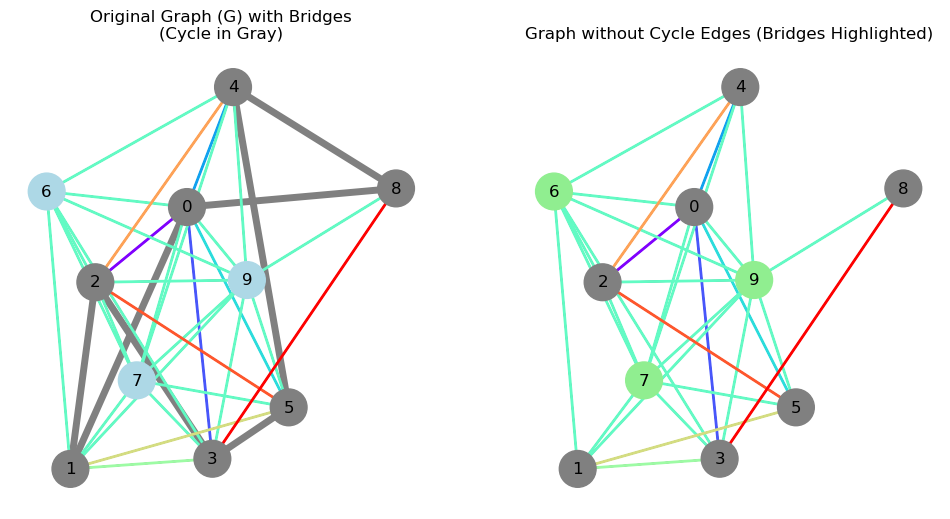

Processing cycle: [1, 2, 3, 1]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 1), (5, 2), (5, 3), (5, 7), (5, 9), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 1), (7, 2), (7, 3), (7, 9), (8, 3), (8, 9), (9, 1), (9, 2), (9, 3)], 'att_ver': {1, 2, 3}}]


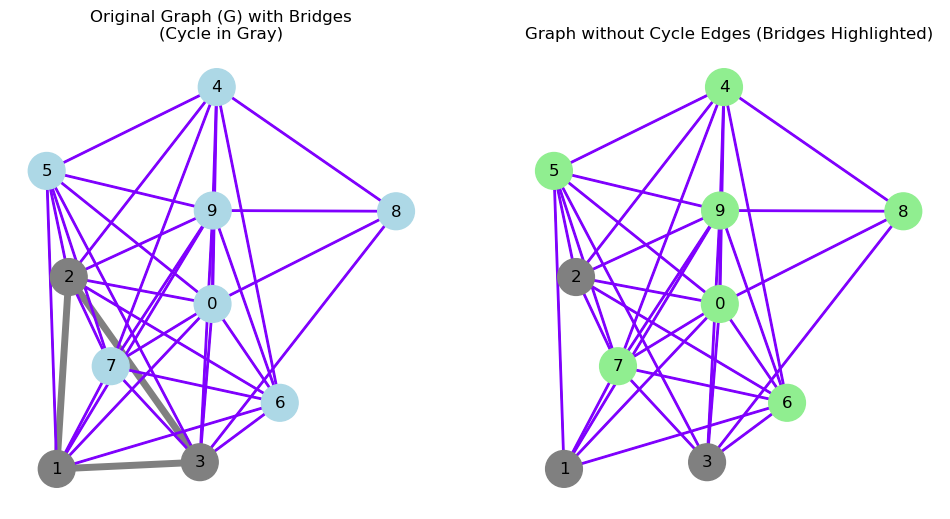

Processing cycle: [1, 2, 3, 5, 1]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 1), (7, 2), (7, 3), (7, 5), (7, 9), (8, 3), (8, 9), (9, 1), (9, 2), (9, 3), (9, 5)], 'att_ver': {1, 2, 3, 5}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}]


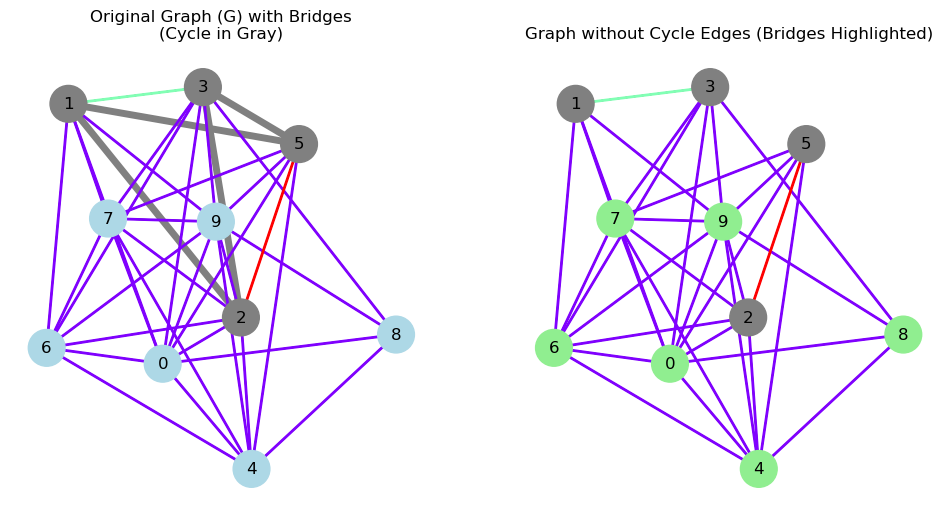

Processing cycle: [1, 2, 3, 5, 4, 6, 1]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 9), (8, 3), (8, 4), (8, 9), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6)], 'att_ver': {1, 2, 3, 4, 5, 6}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}]


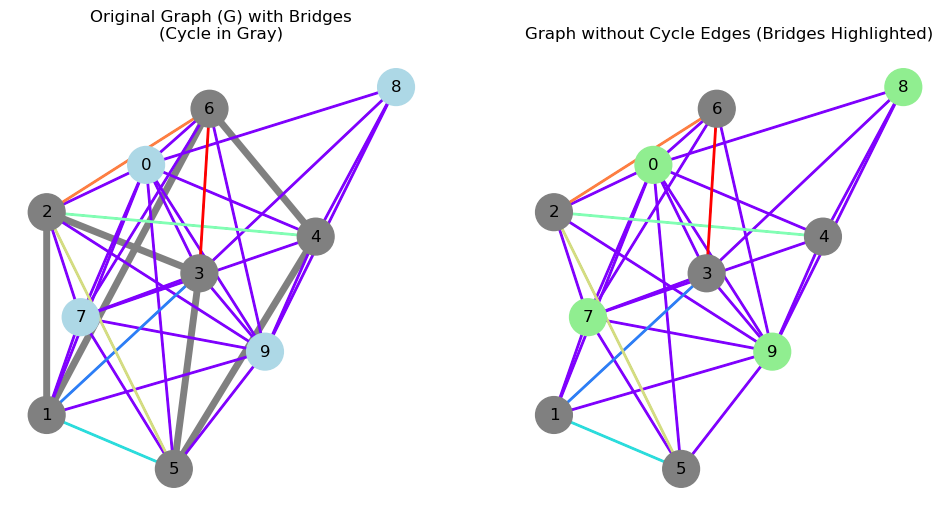

Processing cycle: [1, 2, 3, 5, 4, 6, 7, 1]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (8, 3), (8, 4), (8, 9), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7)], 'att_ver': {1, 2, 3, 4, 5, 6, 7}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 6)], 'att_ver': {1, 6}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(2, 7)], 'att_ver': {2, 7}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}, {'edges': [(3, 7)], 'att_ver': {3, 7}}, {'edges': [(4, 7)], 'att_ver': {4, 7}}, {'edges': [(5, 7)], 'att_ver': {5, 7}}]


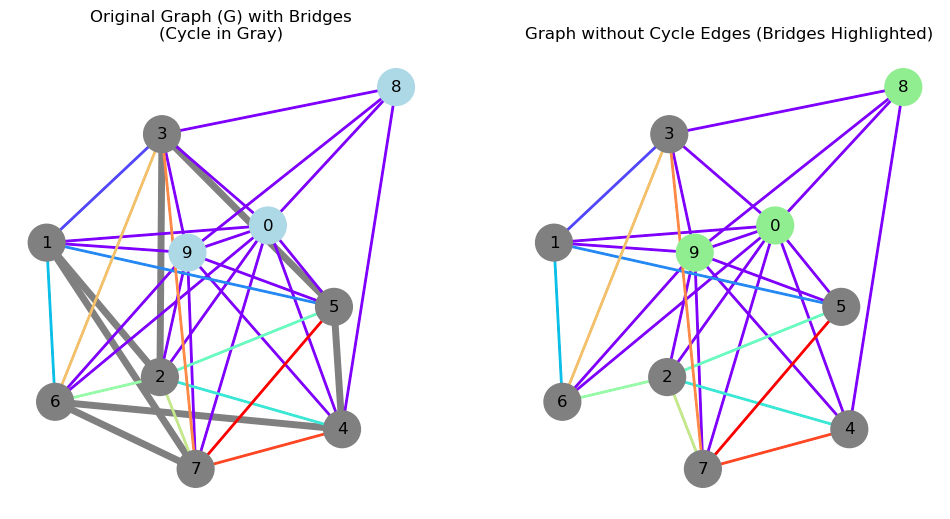

Processing cycle: [1, 0, 9, 1]
Bridges: [{'edges': [(0, 2), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 0), (3, 1), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 7), (5, 9), (6, 0), (6, 1), (6, 7), (6, 9), (7, 0), (7, 1), (7, 9), (8, 0), (8, 9)], 'att_ver': {0, 1, 9}}]


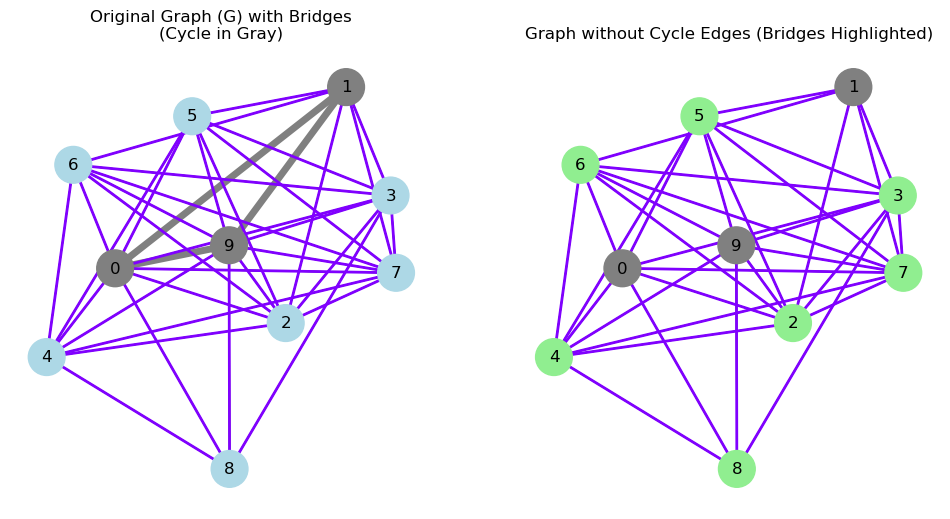

Processing cycle: [2, 3, 5, 4, 2]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9), (8, 3), (8, 4), (8, 9), (9, 2), (9, 3), (9, 4), (9, 5)], 'att_ver': {2, 3, 4, 5}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}]


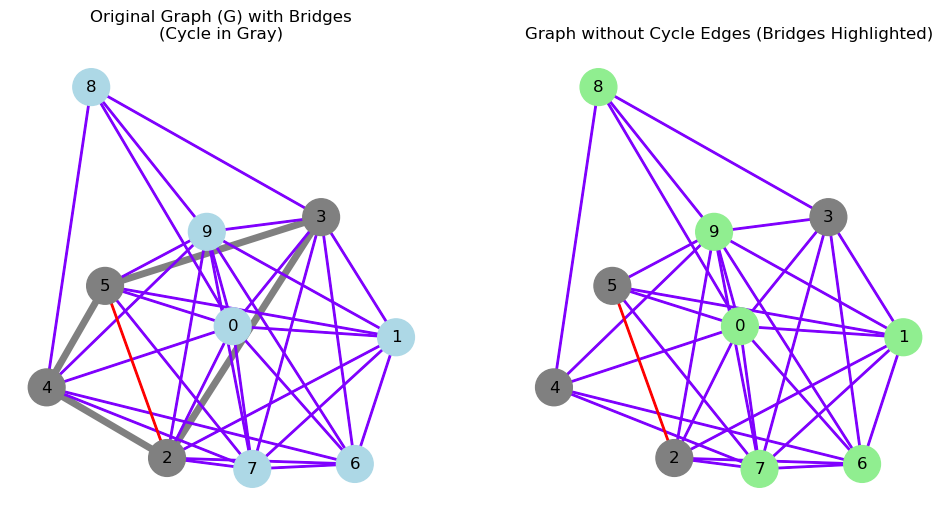

Processing cycle: [2, 3, 5, 2]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (6, 2), (6, 3), (6, 7), (6, 9), (7, 2), (7, 3), (7, 5), (7, 9), (8, 3), (8, 9), (9, 2), (9, 3), (9, 5)], 'att_ver': {2, 3, 5}}]


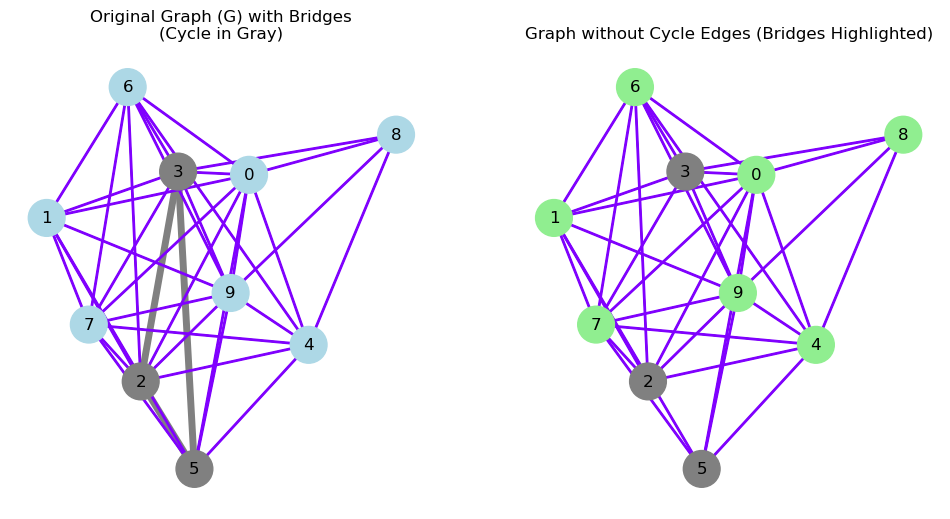

Processing cycle: [2, 3, 5, 4, 6, 2]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 9), (8, 3), (8, 4), (8, 9), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6)], 'att_ver': {2, 3, 4, 5, 6}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}]


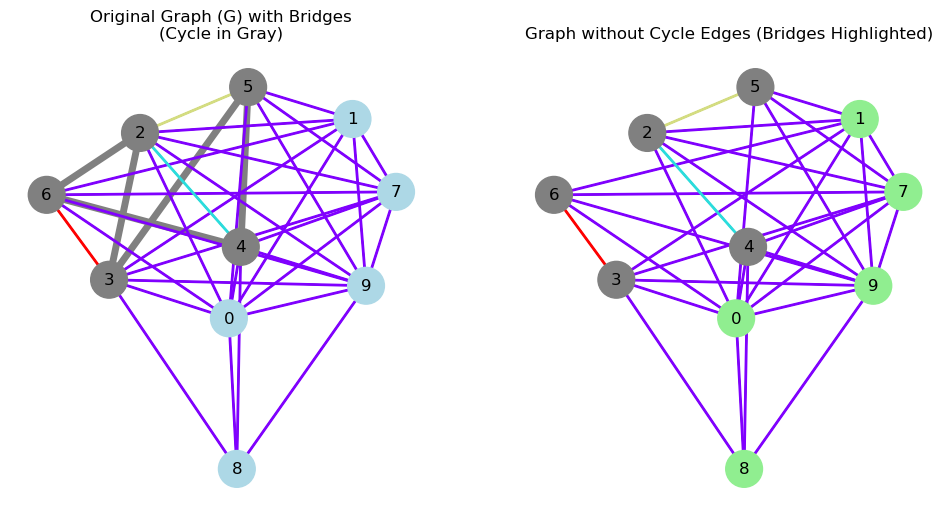

Processing cycle: [2, 3, 5, 4, 6, 7, 2]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (8, 3), (8, 4), (8, 9), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7)], 'att_ver': {2, 3, 4, 5, 6, 7}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}, {'edges': [(3, 7)], 'att_ver': {3, 7}}, {'edges': [(4, 7)], 'att_ver': {4, 7}}, {'edges': [(5, 7)], 'att_ver': {5, 7}}]


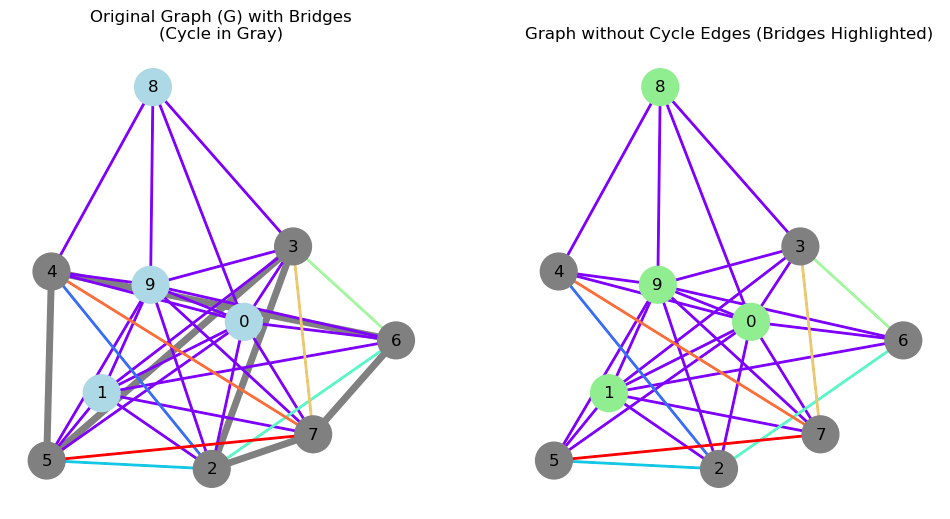

Processing cycle: [2, 1, 0, 9, 2]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3), (3, 1), (3, 2), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (5, 0), (5, 1), (5, 2), (5, 4), (5, 7), (5, 9), (6, 0), (6, 1), (6, 2), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 4), (7, 9), (8, 0), (8, 4), (8, 9), (4, 0), (4, 2), (4, 9)], 'att_ver': {0, 1, 2, 9}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}]


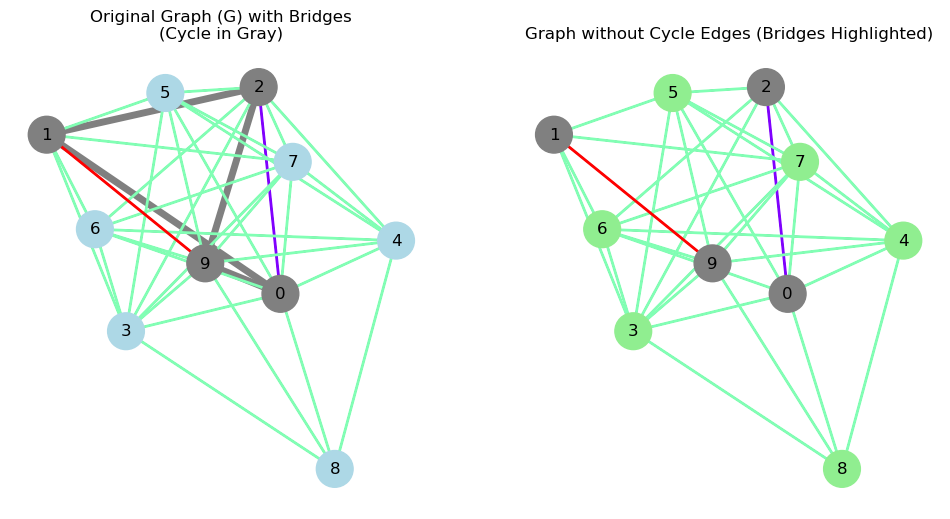

Processing cycle: [3, 5, 4, 6, 3]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (7, 3), (7, 4), (7, 5), (7, 6), (7, 9), (8, 3), (8, 4), (8, 9), (9, 3), (9, 4), (9, 5), (9, 6)], 'att_ver': {3, 4, 5, 6}}]


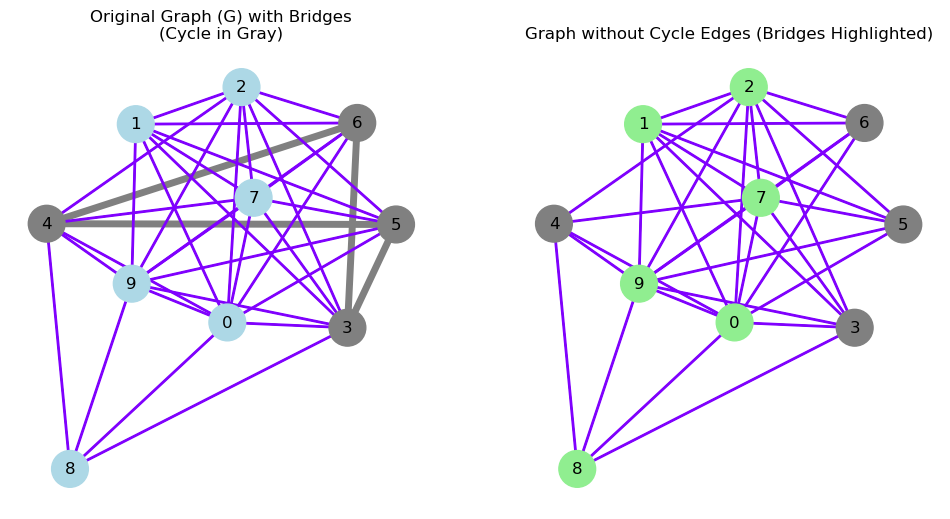

Processing cycle: [3, 5, 4, 6, 7, 3]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (8, 3), (8, 4), (8, 9), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7)], 'att_ver': {3, 4, 5, 6, 7}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}, {'edges': [(4, 7)], 'att_ver': {4, 7}}, {'edges': [(5, 7)], 'att_ver': {5, 7}}]


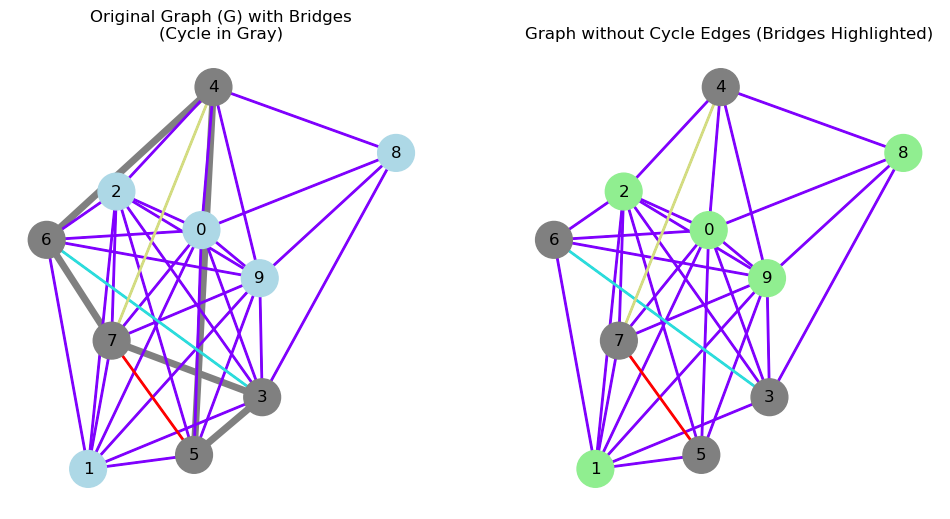

Processing cycle: [3, 5, 4, 8, 3]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (6, 3), (6, 4), (6, 7), (6, 9), (7, 3), (7, 4), (7, 5), (7, 9), (9, 3), (9, 4), (9, 5), (9, 8)], 'att_ver': {8, 3, 4, 5}}]


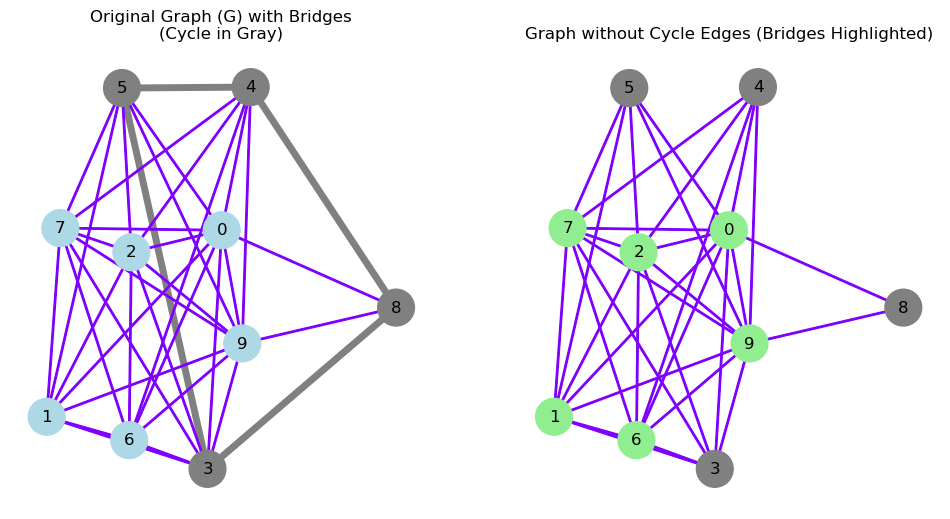

Processing cycle: [3, 2, 1, 0, 9, 3]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 7), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 9), (8, 0), (8, 3), (8, 9)], 'att_ver': {0, 1, 2, 3, 9}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}, {'edges': [(2, 9)], 'att_ver': {9, 2}}]


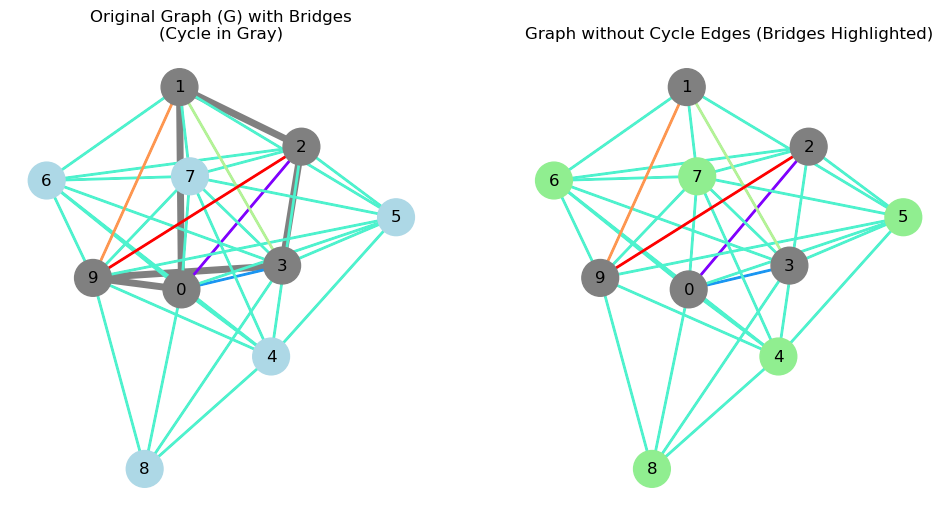

Processing cycle: [4, 6, 7, 4]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (5, 4), (5, 7), (5, 9), (8, 4), (8, 9), (9, 4), (9, 6), (9, 7)], 'att_ver': {4, 6, 7}}]


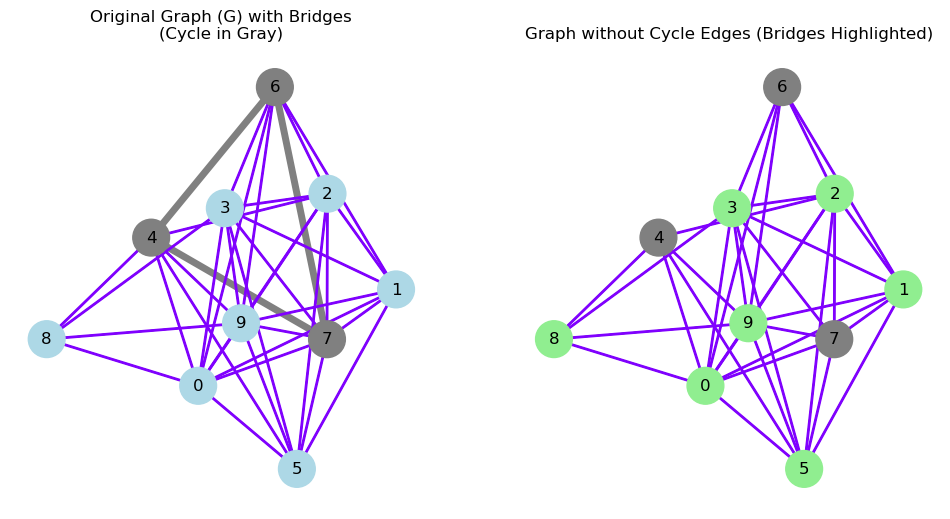

Processing cycle: [4, 5, 3, 2, 1, 0, 9, 4]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9)], 'att_ver': {0, 1, 2, 3, 4, 5, 9}}, {'edges': [(0, 8), (8, 3), (8, 4), (8, 9)], 'att_ver': {0, 9, 3, 4}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 9)], 'att_ver': {9, 2}}, {'edges': [(3, 9)], 'att_ver': {9, 3}}, {'edges': [(5, 9)], 'att_ver': {9, 5}}]


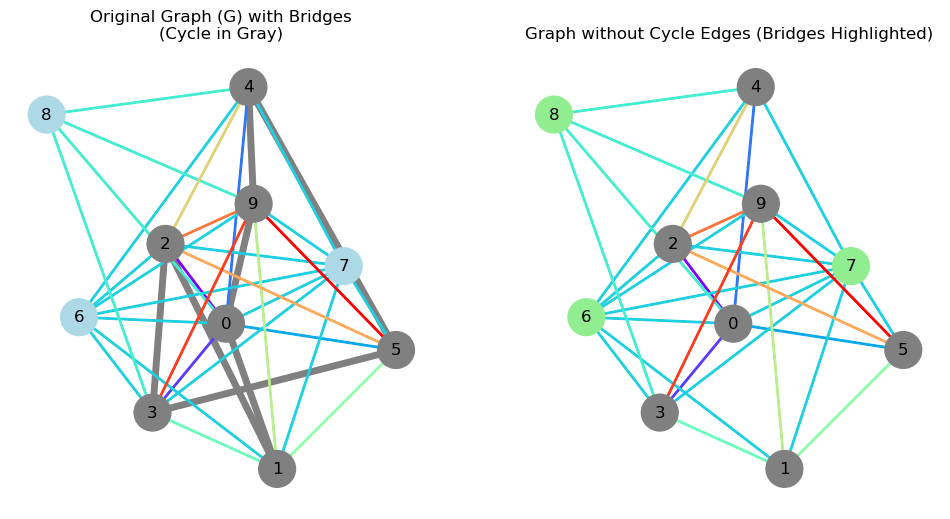

Processing cycle: [5, 4, 6, 7, 5]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (8, 4), (8, 9), (9, 4), (9, 5), (9, 6), (9, 7)], 'att_ver': {4, 5, 6, 7}}, {'edges': [(4, 7)], 'att_ver': {4, 7}}]


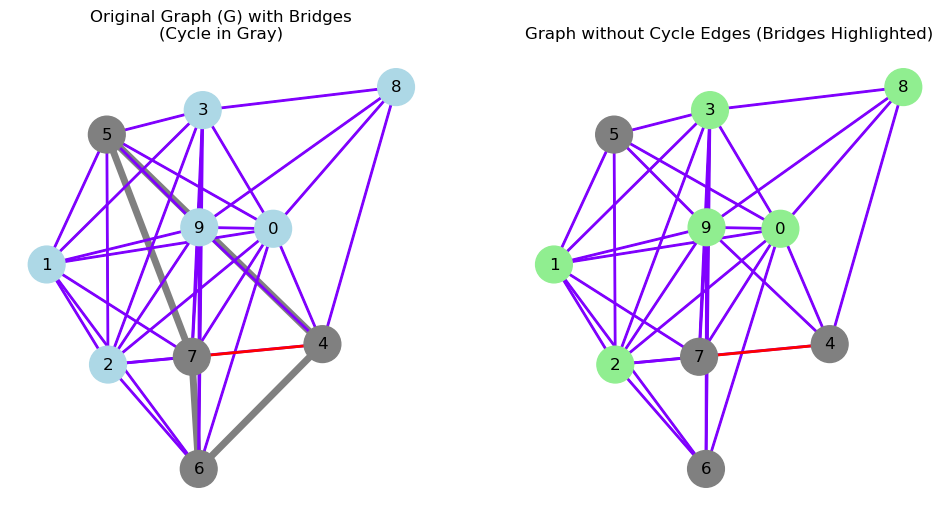

Processing cycle: [5, 3, 2, 1, 0, 9, 5]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 5), (7, 9), (8, 0), (8, 3), (8, 9)], 'att_ver': {0, 1, 2, 3, 5, 9}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 9)], 'att_ver': {9, 2}}, {'edges': [(3, 9)], 'att_ver': {9, 3}}]


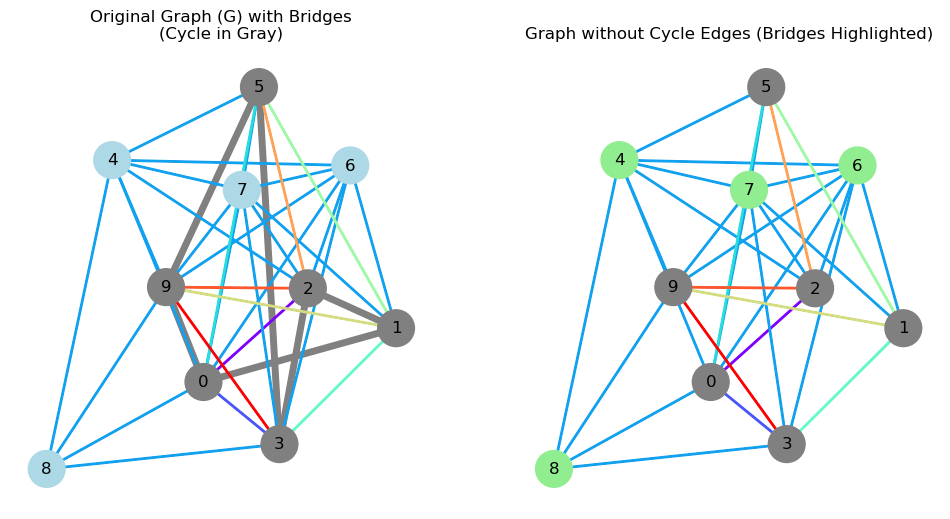

Processing cycle: [6, 4, 5, 3, 2, 1, 0, 9, 6]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6)], 'att_ver': {0, 6}}, {'edges': [(0, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 9)], 'att_ver': {0, 1, 2, 3, 4, 5, 6, 9}}, {'edges': [(0, 8), (8, 3), (8, 4), (8, 9)], 'att_ver': {0, 9, 3, 4}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 6)], 'att_ver': {1, 6}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(2, 9)], 'att_ver': {9, 2}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}, {'edges': [(3, 9)], 'att_ver': {9, 3}}, {'edges': [(4, 9)], 'att_ver': {9, 4}}, {'edges': [(5, 9)], 'att_ver': {9, 5}}]


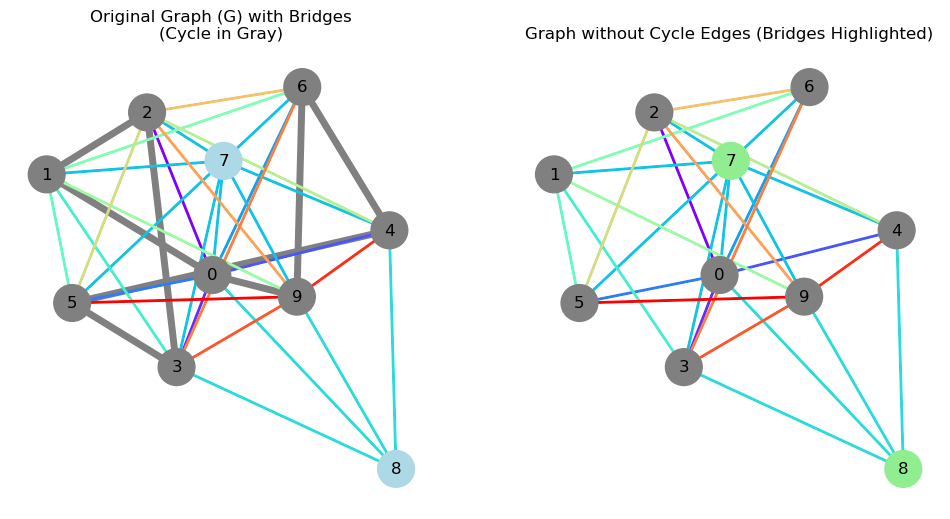

Processing cycle: [7, 6, 4, 5, 3, 2, 1, 0, 9, 7]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6)], 'att_ver': {0, 6}}, {'edges': [(0, 7)], 'att_ver': {0, 7}}, {'edges': [(0, 8), (8, 3), (8, 4), (8, 9)], 'att_ver': {0, 9, 3, 4}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 6)], 'att_ver': {1, 6}}, {'edges': [(1, 7)], 'att_ver': {1, 7}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 6)], 'att_ver': {2, 6}}, {'edges': [(2, 7)], 'att_ver': {2, 7}}, {'edges': [(2, 9)], 'att_ver': {9, 2}}, {'edges': [(3, 6)], 'att_ver': {3, 6}}, {'edges': [(3, 7)], 'att_ver': {3, 7}}, {'edges': [(3, 9)], 'att_ver': {9, 3}}, {'edges': [(4, 7)], 'att_ver': {4, 7}}, {'edges': [(4, 9)], 'att_ver': {9, 4}}, {'edges': [(5, 7)], 'att_ver': 

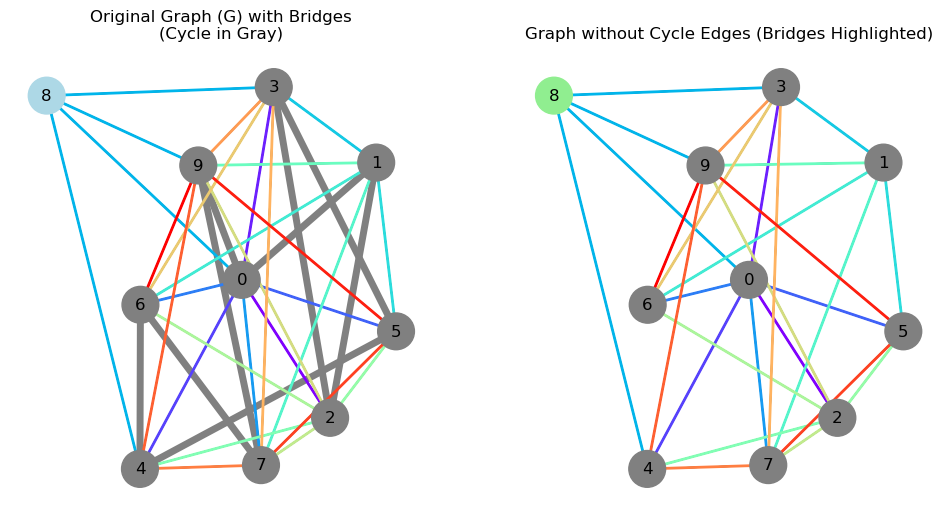

Processing cycle: [8, 4, 5, 3, 2, 1, 0, 9, 8]
Bridges: [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9)], 'att_ver': {0, 1, 2, 3, 4, 5, 9}}, {'edges': [(0, 8)], 'att_ver': {0, 8}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}, {'edges': [(1, 5)], 'att_ver': {1, 5}}, {'edges': [(1, 9)], 'att_ver': {1, 9}}, {'edges': [(2, 4)], 'att_ver': {2, 4}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(2, 9)], 'att_ver': {9, 2}}, {'edges': [(3, 8)], 'att_ver': {8, 3}}, {'edges': [(3, 9)], 'att_ver': {9, 3}}, {'edges': [(4, 9)], 'att_ver': {9, 4}}, {'edges': [(5, 9)], 'att_ver': {9, 5}}]


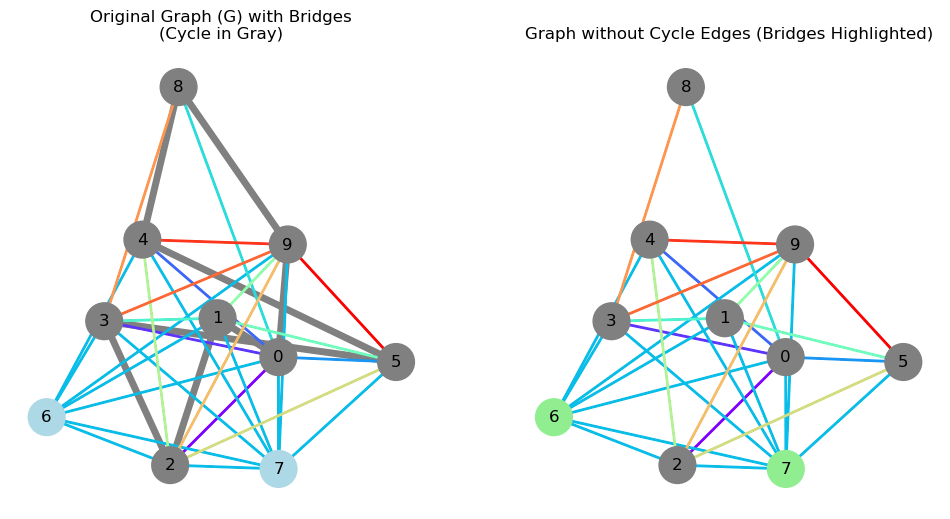

{(0, 1, 2, 0): [{'edges': [(0, 3), (3, 1), (3, 2), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (5, 0), (5, 1), (5, 2), (5, 4), (5, 7), (5, 9), (6, 0), (6, 1), (6, 2), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 4), (7, 9), (8, 0), (8, 4), (8, 9), (9, 0), (9, 1), (9, 2), (9, 4), (4, 0), (4, 2)], 'att_ver': {0, 1, 2}}], (0, 1, 2, 3, 0): [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 4), (4, 2), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 7), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 9), (8, 0), (8, 3), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3)], 'att_ver': {0, 1, 2, 3}}, {'edges': [(1, 3)], 'att_ver': {1, 3}}], (0, 1, 2, 3, 5, 4, 0): [{'edges': [(0, 2)], 'att_ver': {0, 2}}, {'edges': [(0, 3)], 'att_ver': {0, 3}}, {'edges': [(0, 5)], 'att_ver': {0, 5}}, {'edges': [(0, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9), (9, 0), (9, 1), (9, 2), 

In [6]:



### TODO intentar repetir el algoritmo buscando primero componentes triconnexas quitando los edges del ciclo y después haciendo 
### tratamiento especial de aquellas que contienen algún nodo del ciclo, separando esas por el nodo del ciclo. Para ello se puede 
### Hacer DFS desde el nodo del ciclo en las componentes que tengan un ciclo y para cada vecino del nodo del ciclo asignar una nueva
### componente triconnexa distinta de la del resto de vecinos

import matplotlib.pyplot as plt
import networkx as nx

from collections import deque

bridges_all_cycles = {}
attachment_vertices_all_cycles = {}

def find_bridge(G, node, bridge, unvisited):
    print(node, bridge, unvisited)
    for neigh in G.neighbors(node):
        bridge.append(neigh)
        if neigh in unvisited:
            unvisited.remove(neigh)
        if neigh not in c:
            find_bridge(G, node, bridge, unvisited)
        
for c in fundamental_cycles:
    print("Processing cycle:", c)
    
    # Create a copy of the graph and remove cycle edges
    G_no_c_edges = G.copy()
    G_no_c_nodes = G.copy()
    G_no_c_edges.remove_edges_from([(c[i], c[i+1]) for i in range(len(c)-1)])
    G_no_c_nodes.remove_nodes_from(c)
    
    unvisited = list(G_no_c_edges.edges()) ## habría que poner los del ciclo?? para empezar no pero como visited?
    bridges = []
    attachment_vertices = []
    q = deque()
    # print("unvisited", unvisited)
    for edge1 in G_no_c_edges.edges():
        if edge1 in unvisited: ## TODO VER SI SE PUEDE MODIFICAR LA LISTA DINÁMICAMENTE, FORMANDO UN SOLO FOR AQUÍ EN VEZ DE IF Y FOR
            # print("edge", edge1)
            q.append(edge1)
            unvisited.remove(edge1)
            bridge = {"edges": [], "att_ver": set([])}
            bridge["edges"].append(edge1) 
            # attachment_vertices_bridge = set([]) ### ELIMINADO E INTRODUCIDO EN DICT
            while q:
                edge2 = q.popleft()  # Current edge being processed
                
                for node in edge2:
                    if node in c:
                        # attachment_vertices_bridge.add(node) ### ELIMINADO E INTRODUCIDO EN DICT
                        bridge["att_ver"].add(node)
                    else:                       
                        for neighbor in G_no_c_edges.neighbors(node): 
                            # print(v, "vecino:" ,neighbor)
                            new_edge = (node, neighbor) 
                            new_edge_rev = (neighbor, node)
                            # print(new_edge)
                            # print(unvisited)
                            if (new_edge in unvisited) or (new_edge_rev in unvisited) :  # Ensure it's unvisited and not in the cycle
                                # print("añadir")
                                if new_edge in unvisited:
                                    unvisited.remove(new_edge)
                                else:
                                    unvisited.remove(new_edge_rev)
                                if neighbor in c:
                                    # attachment_vertices_bridge.add(neighbor) ######
                                    bridge["att_ver"].add(neighbor)
                                else:
                                    q.append(new_edge)
                                bridge["edges"].append(new_edge)
                                
                # u, v = edge2  # Extract nodes from the edge
                # # Explore edges connected to `v`
                # if v not in c:
                #     for neighbor in G_no_c_edges.neighbors(v): 
                #         # print(v, "vecino:" ,neighbor)
                #         new_edge = (v, neighbor) 
                #         new_edge_rev = (neighbor, v)
                #         # print(new_edge)
                #         # print(unvisited)
                #         if (new_edge in unvisited) or (new_edge_rev in unvisited) :  # Ensure it's unvisited and not in the cycle
                #             # print("añadir")
                #             if new_edge in unvisited:
                #                 unvisited.remove(new_edge)
                #             else:
                #                 unvisited.remove(new_edge_rev)
                #             if neighbor not in c:
                #                 q.append(new_edge)
                #             bridge.append(new_edge)
    
                # # Explore edges connected to `u` (since undirected)
                # if u not in c:
                #     for neighbor in G_no_c_edges.neighbors(u):
                #         # print(u, "vecino:" ,neighbor)
                #         new_edge = (u, neighbor) 
                #         new_edge_rev = (neighbor, u)
                #         if (new_edge in unvisited) or (new_edge_rev in unvisited):  # Ensure it's unvisited and not in the cycle
                #             # print("añadir")
                #             if new_edge in unvisited:
                #                 unvisited.remove(new_edge)
                #             else:
                #                 unvisited.remove(new_edge_rev)
                #             if neighbor not in c:
                #                 q.append(new_edge)
                #             bridge.append(new_edge)
    
            bridges.append(bridge)  # Store the final edge-connected component
            # attachment_vertices.append(attachment_vertices_bridge)  ### ELIMINADO E INTRODUCIDO EN DICT
    print("Bridges:", bridges)
    bridges_all_cycles[tuple(c)] = bridges
    # attachment_vertices_all_cycles[tuple(c)] = attachment_vertices  ### ELIMINADO E INTRODUCIDO EN DICT
    
    #############################
    ### PLOT CYCLE AND GRAPH WO CYCLE ###
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import networkx as nx
    import numpy as np
    
    # Create a figure with two side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Generate a colormap with different colors for bridges **excluding gray**
    num_bridges = len(bridges)
    colors = cm.rainbow(np.linspace(0, 1, num_bridges))  # Get full rainbow range
    colors = [color for color in colors if not np.allclose(color[:3], [0.5, 0.5, 0.5])]  # Exclude gray
    
    # Layout for both graphs (ensures consistent node positions)
    pos = nx.spring_layout(G)
    
    ### LEFT GRAPH: ORIGINAL GRAPH (G) WITH CYCLE AND BRIDGES ###
    axes[0].set_title("Original Graph (G) with Bridges\n(Cycle in Gray)")
    
    # Define node colors: gray for cycle nodes, light blue for others
    node_colors = ["gray" if node in c else "lightblue" for node in G.nodes()]
    
    # Draw all nodes with specific colors
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=node_colors, node_size=700)
    
    # Draw all edges in black by default
    nx.draw_networkx_edges(G, pos, ax=axes[0], edge_color="black")
    
    # Highlight the cycle edges in **thicker gray**
    nx.draw_networkx_edges(G, pos, edgelist=[(c[i], c[i+1]) for i in range(len(c)-1)], edge_color="gray", ax=axes[0], width=5)
    
    # Draw each bridge in a different color (excluding gray)
    for bridge, color in zip(bridges, colors):
        nx.draw_networkx_edges(G, pos, edgelist=bridge["edges"], edge_color=[color], ax=axes[0], width=2)
    
    ### RIGHT GRAPH: MODIFIED GRAPH (G_no_c_edges) WITH BRIDGES ###
    axes[1].set_title("Graph without Cycle Edges (Bridges Highlighted)")
    
    # Define node colors: gray for cycle nodes, light green for others
    node_colors_no_cycle = ["gray" if node in c else "lightgreen" for node in G_no_c_edges.nodes()]
    
    # Draw all nodes
    nx.draw(G_no_c_edges, pos, ax=axes[1], with_labels=True, node_color=node_colors_no_cycle, node_size=700)
    
    # Draw all edges in black by default
    nx.draw_networkx_edges(G_no_c_edges, pos, ax=axes[1], edge_color="black")
    
    # Draw each bridge in a different color (excluding gray)
    for bridge, color in zip(bridges, colors):
        nx.draw_networkx_edges(G_no_c_edges, pos, edgelist=bridge["edges"], edge_color=[color], ax=axes[1], width=2)
    
    # Show the visualization
    plt.show()
    ### END PLOT CYCLE AND GRAPH WO CYCLE ###
    #############################

print(bridges_all_cycles)
# print(attachment_vertices_all_cycles)  ### ELIMINADO E INTRODUCIDO EN DICT

In [7]:
from itertools import combinations

### TODO OPERAR CNF_LISTS USANDO ÍNDICES PARA QUE LOS GRAFOS PUEDAN TENER CUALQUIER ÍNDICE DE NODOS. 

CNF_lists = [[[set([]) for _ in range(4)] for _ in range(len(fundamental_cycles))] for _ in range(len(G.nodes()))]  # TODO HAY QUE CAMBIAR AQUÍ QUE SEA POR NODES Y NO POR EDGES
# 0: PP_c,n  1: PN_c,n  2: NP_c,n  3: NN_c,n

def get_nodes(bridge, c):
    seen = set()
    for u, v in bridge:
        if u not in c:  ## TODO, PENSAR SI HAY QUE INCLUIR LOS DE LOS NODOS. SE DAN CASOS CON UNA ARISTA EN LOS QUE NO SE INCLUYE NINGÚN NODO Y, POR TANTO, NO APARECE EN LAS LISTAS
            seen.add(u)
        if v not in c:    
            seen.add(v)
    return list(seen)
    
# # condition a)
# for c_index, c in enumerate(fundamental_cycles):
#     for bridge in bridges_all_cycles[tuple(c)]:
#         for pair in combinations(get_nodes(bridge, c), 2):
#             CNF_lists[pair[0]][c_index][0].add(pair[1])
#             CNF_lists[pair[1]][c_index][0].add(pair[0])
#             CNF_lists[pair[0]][c_index][3].add(pair[1])
#             CNF_lists[pair[1]][c_index][3].add(pair[0])

# condition b)
for c_index, c in enumerate(fundamental_cycles):
    for bridge in bridges_all_cycles[tuple(c)]:
        for pair in combinations(get_nodes(bridge, c), 2):


# Functions for condition c)
def conflict_type_1(bridge_pair, c):
    common_att_vert = 0
    for vertex in bridge_pair[0]["att_ver"]:
        if vertex in bridge_pair[1]["att_ver"]: 
            common_att_vert += 1
            if common_att_vert >= 3: return True ### TODO REVISAR ESTE BREAK
    return common_att_vert >=3
    
# def conflict_type_2_MALO(bridge_pair, c):  ### TODO checkear que los ciclos siempre entran aquí ordenados
#     matching_seq = [-1] # -1 means that next attachment vertex will advance the matching sequence
#     position = 0
#     for node in c:
#         if (node in bridge_pair[0]["att_ver"]) and (node in bridge_pair[1]["att_ver"]):
#             matching_seq.append(-1)
#             position += 1
#         elif (node in bridge_pair[0]["att_ver"]):
#             if (matching_seq[position] == 1) or (matching_seq[position] == -1):
#                 matching_seq.append(0)
#                 position += 1
#                 if len(matching_seq) >= 5: return True
#         elif (node in bridge_pair[1]["att_ver"]):
#             if (matching_seq[position] == 0) or (matching_seq[position] == -1):
#                 matching_seq.append(1)
#                 position += 1
#                 if len(matching_seq) >= 5: return True
#     return len(matching_seq) >= 5
    
def conflict_type_2(bridge_pair, c):  ### TODO checkear que los ciclos siempre entran aquí ordenados
    matching_seq = 0 # -1 means that next attachment vertex will advance the matching sequence

    # Look for the pattern starting on attachment vertices of both pairs
    print("#################")
    print(bridge_pair, c)
    for node in c[0:len(c) - 1]:
        print()
        print(node)
        print(matching_seq)
        if (node in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 0:
            matching_seq += 1
            print(matching_seq)
            if matching_seq >= 4: return True
        elif (node in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 1:
            matching_seq += 1
            print(matching_seq)
            if matching_seq >= 4: return True
                
    # Treat last node of the cycle differently. Otherwise, there can be errors if the starting node
    # of the cycle is of attachment of both bridges.
    if (c[len(c) - 1]  in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 1 and (c[len(c) - 1] not in bridge_pair[0]["att_ver"]):
        matching_seq += 1
        print(matching_seq)
        if matching_seq >= 4: return True
                
    matching_seq = 0         
    for node in c[0:len(c) - 1]:
        print()
        print(node)
        print(matching_seq)
        if (node in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 0:
            matching_seq += 1
            print(matching_seq)
            if matching_seq >= 4: return True
        elif (node in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 1:
            matching_seq += 1
            print(matching_seq)
            print(matching_seq >= 4)
            if matching_seq >= 4: return True ## TODO ALGUNOS DE ESTOS SOBRAN SEGÚN LOS MÓDULOS

    # Treat last node of the cycle differently. Otherwise, there can be errors if the starting node
    # of the cycle is of attachment of both bridges.
    if (c[len(c) - 1] in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 1 and (c[len(c) - 1] not in bridge_pair[1]["att_ver"]):
        matching_seq += 1
        if matching_seq >= 4: return True
    
    return matching_seq >= 4
        

def conflict_between(bridge_pair, c):
    # print("conflict:", c, bridge_pair,"---", conflict_type_1(bridge_pair, c), conflict_type_2(bridge_pair, c))
    return conflict_type_1(bridge_pair, c) or conflict_type_2(bridge_pair, c)

# condition c)
for c_index, c in enumerate(fundamental_cycles):
    for bridge_pair in combinations(bridges_all_cycles[tuple(c)], 2):
        if conflict_between(bridge_pair, c):
            print("CONFLICT BETWEEN", bridge_pair, c)
            print(get_nodes(bridge_pair[0]["edges"], c))
            print(get_nodes(bridge_pair[1]["edges"], c))
            for node1 in get_nodes(bridge_pair[0]["edges"], c):
                for node2 in get_nodes(bridge_pair[1]["edges"], c):
                    print("writing conflict between", node1, node2)
                    CNF_lists[node1][c_index][1].add(node2)
                    CNF_lists[node1][c_index][2].add(node2)
                    CNF_lists[node2][c_index][1].add(node1)
                    CNF_lists[node2][c_index][2].add(node1)
                



# # condition c)  # INTENTO MALO
# for c_index, c in enumerate(fundamental_cycles):
#     conflicts = [[False for _ in range(len(bridges_all_cycles[tuple(c)])] for _ in range(len(bridges_all_cycles[tuple(c)])]
#     for bridge_index1, bridge1 in bridges_all_cycles[tuple(c)]:
#         for bridge_index2, bridge2 in bridges_all_cycles[tuple(c)]: # TODO NO HACE FALTA RECORRER TODO PORQUE ES SIMÉTRICO
#             if conflict_between(bridge1, bridge2):
#                 conflicts[bridge_index1][bridge_index2] = True


# print(CNF_lists) ###

def print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles):
    for c_index, cycle in enumerate(fundamental_cycles):
        print(f"\nCycle {c_index} (Nodes: {cycle}):")
        for node_index, node in enumerate(CNF_lists):
            cnf_conditions = CNF_lists[node_index][c_index]
            if any(cnf_conditions):  # Only print nodes that have conditions
                print(f"  Node {node_index}:")
                print(f"    PP_c,n (Positive-Positive): {cnf_conditions[0]}")
                print(f"    PN_c,n (Positive-Negative): {cnf_conditions[1]}")
                print(f"    NP_c,n (Negative-Positive): {cnf_conditions[2]}")
                print(f"    NN_c,n (Negative-Negative): {cnf_conditions[3]}")
        print("-" * 50)

# Call the function to display CNF lists with corresponding cycles
print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles)

            

CONFLICT BETWEEN ({'edges': [(0, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 9)], 'att_ver': {0, 1, 2, 3, 4, 5, 9}}, {'edges': [(0, 8), (8, 3), (8, 4), (8, 9)], 'att_ver': {0, 9, 3, 4}}) [4, 5, 3, 2, 1, 0, 9, 4]
[6, 7]
[8]
writing conflict between 6 8
writing conflict between 7 8
CONFLICT BETWEEN ({'edges': [(0, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 9)], 'att_ver': {0, 1, 2, 3, 4, 5, 6, 9}}, {'edges': [(0, 8), (8, 3), (8, 4), (8, 9)], 'att_ver': {0, 9, 3, 4}}) [6, 4, 5, 3, 2, 1, 0, 9, 6]
[7]
[8]
writing conflict between 7 8
[[[set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], [set(), set(), set(), set()], 

In [8]:
# GENERADOR DE CICLOS ANTIGUO MALO

# import networkx as nx
# import random

# # Select a random starting node
# random_node = random.choice(list(G.nodes))

# # Get a spanning tree using DFS
# spanning_tree = nx.dfs_tree(G, source=random_node)

# # Convert spanning tree to an undirected graph
# spanning_tree_undirected = nx.Graph(spanning_tree)

# # Find edges not in the spanning tree (back edges)
# generating_edges = list(G.edges() - spanning_tree.edges())
# print("Generating edges: ", generating_edges, G.edges(), spanning_tree_undirected.edges())
# # Find the fundamental set of cycles
# fundamental_cycles = []
# for u, v in generating_edges:
#     # Find the path in the spanning tree between u and v
#     path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
#     cycle = path + [u]  # Complete the cycle
#     print(u, v, cycle)
#     fundamental_cycles.append(cycle)

# # Print fundamental cycles
# for i, cycle in enumerate(fundamental_cycles):
#     print(f"Cycle {i+1}: {cycle} (generated by edge {generating_edges[i]})")
